In [17]:
import torch
import numpy as np
from torchvision import datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data.sampler import SubsetRandomSampler

#Number of subprocesses to be used for data loading
numworkers = 0
batch_size = 20
valid_size = 0.2


transform = transforms.Compose([transforms.RandomHorizontalFlip(),
                                transform.RandomRotation(10)
                                transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_data = datasets.CIFAR10('CIFAR_data/', download=True, train=True, transform = transform)

num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(num_train * valid_size))
train_idx, valid_idx = indices[split:], indices[:split]

train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, sampler = train_sampler)
valid_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, sampler = valid_sampler)

test_data = datasets.CIFAR10('CIFAR_data/', download=True, train=False, transform = transform)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size)


Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

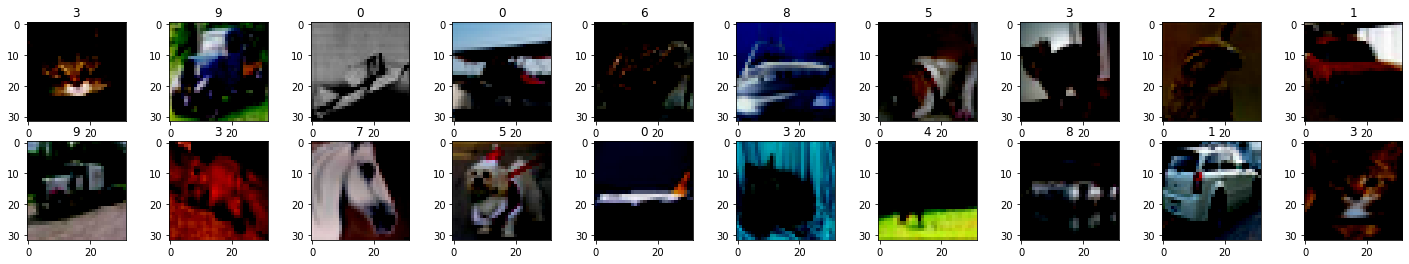

In [18]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
#Plot some images
images, labels = next(iter(train_loader))

images = images.numpy().transpose(0, 2 , 3 ,1)

fig = plt.figure(figsize = (25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx+1)
    ax.imshow(images[idx])
    ax.set_title(str(labels[idx].item()))

In [31]:
import torch.nn as nn
import torch.nn.functional as F
from torch import optim

## TODO: Define the NN architecture
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding = 1)
        self.conv2 = nn.Conv2d(16, 8, 3, padding = 1)
        self.fc1 = nn.Linear(512, 256)
        self.fc2 = nn.Linear(256, 10)
        self.dropout = nn.Dropout(p=0.2)
        self.maxpool = nn.MaxPool2d(2, 2)
        

    def forward(self, x):
        # add hidden layer, with relu activation function
        x = self.maxpool(F.relu(self.conv1(x)))
        x = self.maxpool(F.relu(self.conv2(x)))
        x = x.view(-1, 8*8*8)
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.fc2(x)
        
        return x

# initialize the NN
model = CNN()
print(model)

CNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=512, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)


In [33]:
#Train the model
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
epochs = 30
valid_loss_min = np.Inf

for epoch in range(epochs):
    train_loss = 0.0
    valid_loss = 0.0
    
    #Training Loop
    for data, target in train_loader :
        
        optimizer.zero_grad()        
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()*data.size(0)
        
    #Validation Loop
    for data, target in valid_loader :
        
        output = model(data)
        loss = criterion(output, target)
        valid_loss += loss.item()*data.size(0)
    
    #Average loss over an epoch
    training_loss = train_loss/len(train_loader.dataset)
    validation_loss = valid_loss/len(valid_loader.dataset)
    
    print('--Epoch {}---'.format(epoch+1))
    print('Training Loss : {}, Validation Loss : {}'.format(training_loss, validation_loss))
    
    if validation_loss < valid_loss_min :
        print('Validation Loss decreased from {} ---> {}. Saving model...'.format(valid_loss_min, validation_loss))
        torch.save(model.state_dict(), 'model.pt')
        valid_loss_min = validation_loss
        

--Epoch 1---
Training Loss : 1.5827503854751588, Validation Loss : 0.34316179046630857
Validation Loss decreased from inf ---> 0.34316179046630857. Saving model...
--Epoch 2---
Training Loss : 1.2802675975322724, Validation Loss : 0.29999191036224365
Validation Loss decreased from 0.34316179046630857 ---> 0.29999191036224365. Saving model...
--Epoch 3---
Training Loss : 1.1503266733646393, Validation Loss : 0.27302011065483095
Validation Loss decreased from 0.29999191036224365 ---> 0.27302011065483095. Saving model...
--Epoch 4---
Training Loss : 1.0599177397727966, Validation Loss : 0.26634382343292234
Validation Loss decreased from 0.27302011065483095 ---> 0.26634382343292234. Saving model...
--Epoch 5---
Training Loss : 0.9841713272094726, Validation Loss : 0.24286554107666017
Validation Loss decreased from 0.26634382343292234 ---> 0.24286554107666017. Saving model...
--Epoch 6---
Training Loss : 0.924791268157959, Validation Loss : 0.24021189866065978
Validation Loss decreased from

In [34]:
#Load the saved model
model.load_state_dict(torch.load('model.pt'))

<All keys matched successfully>

In [35]:
#Test the model
accuracy = 0
test_loss = 0
batch_num = 0
for data, labels in test_loader:
    
    batch_num += 1
    output = model(data)
    test_loss += criterion(output, labels)
    preds = np.argmax(output.detach().numpy(), axis=1)
    equals = preds == labels.numpy()
    curr_accuracy = equals.mean()
    print("Accuracy on batch {} : {}".format(batch_num, curr_accuracy))
    accuracy += curr_accuracy

print('Test Loss : {}'.format(test_loss/len(test_loader)))
print('Overall Accuracy : {}'.format(accuracy/len(test_loader)))

Accuracy on batch 1 : 0.7
Accuracy on batch 2 : 0.65
Accuracy on batch 3 : 0.6
Accuracy on batch 4 : 0.7
Accuracy on batch 5 : 0.65
Accuracy on batch 6 : 0.7
Accuracy on batch 7 : 0.65
Accuracy on batch 8 : 0.5
Accuracy on batch 9 : 0.7
Accuracy on batch 10 : 0.6
Accuracy on batch 11 : 0.65
Accuracy on batch 12 : 0.55
Accuracy on batch 13 : 0.45
Accuracy on batch 14 : 0.65
Accuracy on batch 15 : 0.75
Accuracy on batch 16 : 0.7
Accuracy on batch 17 : 0.7
Accuracy on batch 18 : 0.7
Accuracy on batch 19 : 0.7
Accuracy on batch 20 : 0.65
Accuracy on batch 21 : 0.75
Accuracy on batch 22 : 0.6
Accuracy on batch 23 : 0.6
Accuracy on batch 24 : 0.6
Accuracy on batch 25 : 0.6
Accuracy on batch 26 : 0.8
Accuracy on batch 27 : 0.7
Accuracy on batch 28 : 0.6
Accuracy on batch 29 : 0.7
Accuracy on batch 30 : 0.65
Accuracy on batch 31 : 0.85
Accuracy on batch 32 : 0.75
Accuracy on batch 33 : 0.7
Accuracy on batch 34 : 0.4
Accuracy on batch 35 : 0.65
Accuracy on batch 36 : 0.55
Accuracy on batch 37 :

Accuracy on batch 292 : 0.5
Accuracy on batch 293 : 0.55
Accuracy on batch 294 : 0.55
Accuracy on batch 295 : 0.7
Accuracy on batch 296 : 0.5
Accuracy on batch 297 : 0.75
Accuracy on batch 298 : 0.6
Accuracy on batch 299 : 0.75
Accuracy on batch 300 : 0.75
Accuracy on batch 301 : 0.6
Accuracy on batch 302 : 0.75
Accuracy on batch 303 : 0.8
Accuracy on batch 304 : 0.5
Accuracy on batch 305 : 0.6
Accuracy on batch 306 : 0.8
Accuracy on batch 307 : 0.45
Accuracy on batch 308 : 0.6
Accuracy on batch 309 : 0.45
Accuracy on batch 310 : 0.95
Accuracy on batch 311 : 0.65
Accuracy on batch 312 : 0.5
Accuracy on batch 313 : 0.65
Accuracy on batch 314 : 0.6
Accuracy on batch 315 : 0.65
Accuracy on batch 316 : 0.7
Accuracy on batch 317 : 0.8
Accuracy on batch 318 : 0.8
Accuracy on batch 319 : 0.65
Accuracy on batch 320 : 0.65
Accuracy on batch 321 : 0.55
Accuracy on batch 322 : 0.45
Accuracy on batch 323 : 0.75
Accuracy on batch 324 : 0.8
Accuracy on batch 325 : 0.85
Accuracy on batch 326 : 0.65
A